<a href="https://colab.research.google.com/github/itdhirendra/ASP.NET-Core-Clean-Architecture-CQRS-Event-Sourcing/blob/main/Introduction_To_Fully_Connected_NN_%E2%80%93_Assignment_Submitedby_Dhirendra_Kumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Expected Goal : To build a Fully Connected Neural Network (FCNN) that accurately classifies images from the Fashion MNIST dataset into 10 categories (like T-shirt, trouser, etc.).

In [2]:
#import required libarary
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

In [3]:
# Load dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Shape info
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


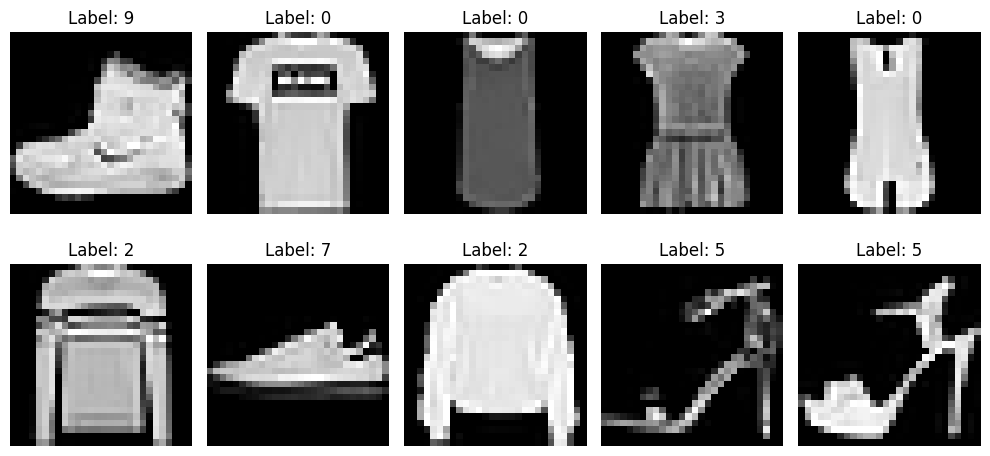

In [5]:
# Visualize a few images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

Data Preprocessing :

-Normalize pixel values (0–255 → 0–1)

-Flatten 28x28 images into 784-element vectors for FCNN

-Convert labels to one-hot encoded format (10 classes) : One-hot encoding is needed because our output has 10 classes — each needs a separate neuron in the output layer.



In [6]:
# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0


In [7]:
# Flatten images
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)


In [8]:
# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

 Build the Fully Connected Neural Network :
- Input layer: 784 inputs (flattened image)
- Hidden layers: 2 dense layers (128 and 64 neurons) with ReLU activation : ReLU helps to introduce non-linearity and avoid vanishing gradients.
- Output layer: 10 neurons with Softmax (for multiclass classification): Softmax ensures we get probabilities for each class (the class with highest probability is the prediction).

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 categories
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile and Train the Model :
- Loss Function: Categorical Crossentropy (used for multi-class classification)
- Optimizer: Stochastic Gradient Descent (SGD) -SGD is a simple and effective optimization algorithm to update weights.
- Validation Split: Hold back 20% of training data for validation , Validation helps detect overfitting early by checking performance on unseen data.





In [10]:
#Complie the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

In [11]:
# Train model with validation split
history = model.fit(
    x_train, y_train_cat,
    epochs=20,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5316 - loss: 1.5897 - val_accuracy: 0.7422 - val_loss: 0.7714
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7590 - loss: 0.7328 - val_accuracy: 0.7922 - val_loss: 0.6258
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7973 - loss: 0.6103 - val_accuracy: 0.8136 - val_loss: 0.5600
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8125 - loss: 0.5568 - val_accuracy: 0.8198 - val_loss: 0.5283
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8197 - loss: 0.5259 - val_accuracy: 0.8261 - val_loss: 0.5040
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8302 - loss: 0.4988 - val_accuracy: 0.8283 - val_loss: 0.4968
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8317 - loss: 0.4857 - val_accuracy: 0.8321 - val_loss: 0.4815
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8360 - loss: 0.4705 - val_accuracy: 0.

Performance Evaluation :  Evaluate Model and Visualize Results
- Evaluate model on test data
- Plot training vs validation accuracy/loss

In [12]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"\nTest Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8467 - loss: 0.4365

Test Accuracy: 0.8422


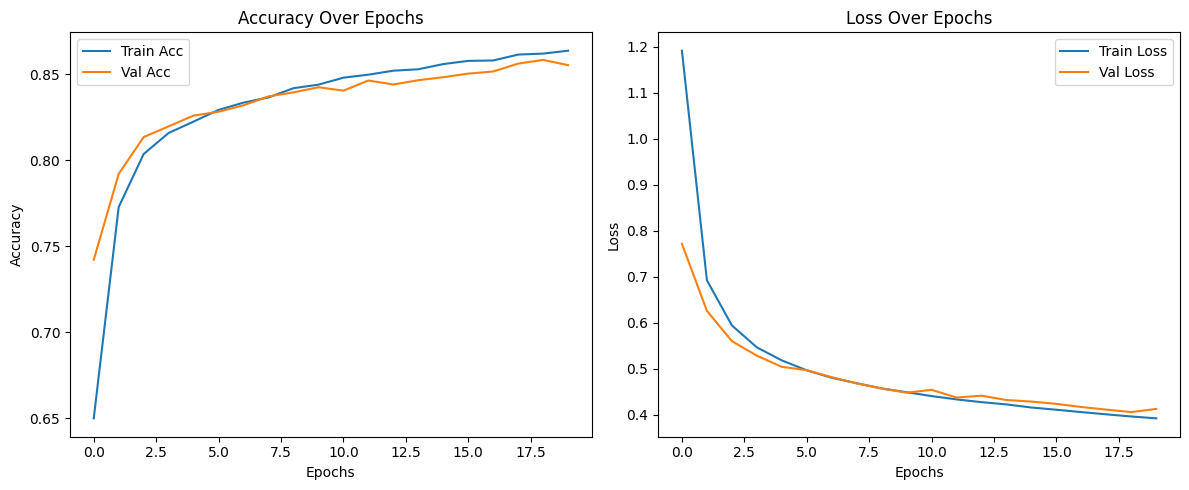

In [17]:
# Plot accuracy and loss
plt.figure(figsize=(12, 5))
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()